In [69]:
import pandas as pd
from ast import literal_eval

today = "2019-07-27"

df = pd.read_csv(f"out/{today}-test.csv")
df["shape1"] = df.shape1.apply(literal_eval)
df["shape2"] = df.shape2.apply(literal_eval)
df["total_params1"] = df.shape1.apply(lambda x: x[0] * x[1])
df["total_params2"] = df.shape2.apply(lambda x: x[0] * x[1])
df["same"] = df.actual_fastest == df.predicted_fastest
df.tail()

,actual_fastest,constant,direct_time,fft_time,mode,predicted_fastest,shape1,shape2,total_params1,total_params2,same
986,fft,81261.988432,0.245912,0.006102,full,fft,"(183, 183)","(16, 16)",33489,256,True
987,fft,81261.988432,0.325509,0.001849,full,fft,"(160, 160)","(23, 23)",25600,529,True
988,fft,81261.988432,0.004696,0.001259,full,fft,"(25, 25)","(13, 13)",625,169,True
989,direct,81261.988432,0.000211,0.000848,full,direct,"(11, 11)","(7, 7)",121,49,True
990,direct,81261.988432,0.002830,0.004534,full,fft,"(109, 109)","(3, 3)",11881,9,False


In [70]:
acc = (df.actual_fastest == df.predicted_fastest).sum() / len(df)
print(f"Predicted fastest method {100 * acc:0.2f}% of the time")

Predicted fastest method 93.74% of the time


In [71]:
wrong = df[~df.same]
wrong[["shape1", "shape2", "direct_time", "fft_time"]]

,shape1,shape2,direct_time,fft_time
9,"(14, 14)","(12, 12)",0.001599,0.001009
17,"(41, 41)","(8, 8)",0.003295,0.003725
27,"(3, 3)","(55, 55)",0.000522,0.000958
71,"(4, 4)","(156, 156)",0.010091,0.022441
75,"(8, 8)","(14, 14)",0.003940,0.002435
95,"(16, 16)","(10, 10)",0.001078,0.000830
138,"(8, 8)","(23, 23)",0.000821,0.000603
143,"(35, 35)","(5, 5)",0.000597,0.000601
173,"(7, 7)","(29, 29)",0.001585,0.023075
175,"(9, 9)","(36, 36)",0.005891,0.035932


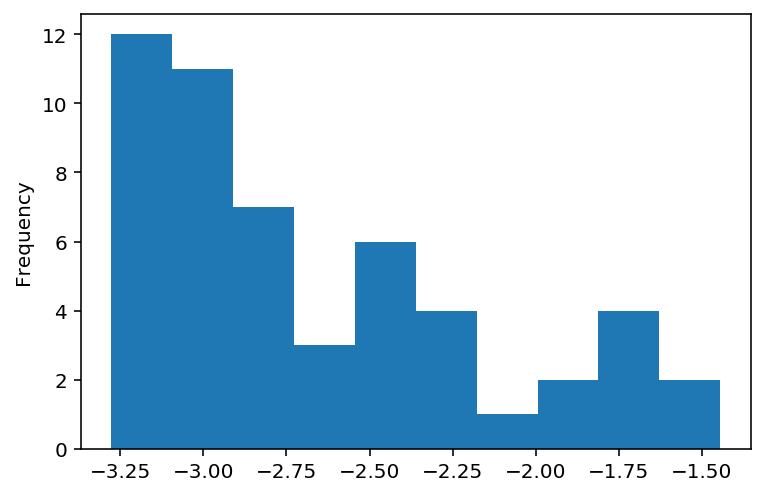

In [68]:
import numpy as np
slow_times = wrong[["direct_time", "fft_time"]].max(axis="columns")
np.log10(slow_times).plot.hist(bins=10)